# 🧩 시나리오 기반 프로젝트 실습 문제
## 🎓 AI 스타트업에서의 첫 실전 미션!

당신은 AI 스타트업 `InsightMind`의 신입 머신러닝 엔지니어입니다. 첫 출근과 동시에 두 가지 미션이 주어집니다:
- 부동산 기업의 주택 가격 예측 시스템 개발
- 식물원 전시를 위한 붓꽃 품종 분류기 개발

이 문제들은 실습 중심으로 구성되어 있으며, 각 단계에서 코드를 직접 작성하고 결과를 분석합니다.

## ✅ 미션 A. 데이터 준비 및 스케일링 요정의 조언
**🧙‍♀️ 요정 조언:** 거리 기반 모델들은 특성의 크기에 민감하단다. 스케일링을 안 하면 예측이 뒤틀릴 거야!

### 🔹 문제 A-1
왜 스케일링이 중요한지, 그 이유를 KNN과 연관지어 2가지 이상 설명하고 `StandardScaler` 또는 `MinMaxScaler` 예시 코드를 작성하세요.

### 정답: KNN은 거리기반 모델은 값의 크기에 영향을 크게 받는다. 범위 차이가 크게 나면 왜곡이 발생할 수 있기 때문에 스케일링을 통해 모든 특성이 같은 중요도로 거리 계산에 참여할수 있게끔 한다.

In [1]:
#StandardScaler : 퍙군 0, 표준편차 1 로 변환.

from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array([[180, 80],[160, 60],[150, 70]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[ 1.33630621  1.22474487]
 [-0.26726124 -1.22474487]
 [-1.06904497  0.        ]]


In [2]:
#MinMaxScaler: 0~1 사이로 정규화
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[1.         1.        ]
 [0.33333333 0.        ]
 [0.         0.5       ]]


### 🔹 문제 A-2
`fetch_california_housing()`과 `load_iris()` 데이터를 불러와 train/test split하고 `StandardScaler`를 적용하여 전처리된 결과를 확인하세요.

In [9]:
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1, y1 = fetch_california_housing(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)
print("X1 shape:", X1.shape) #데이터 크기 
print("y1 shape:", y1.shape)
print("X1 train shape:", X1_train.shape) #훈련용 80%
print("y1 train shape:", y1_train.shape )
print("X1_train:", X1_train)

#X1_train에 대해 fit_transform() 수행(학습 및 데이터 변환)
standard_scaler = StandardScaler()
X1_train_scaled = standard_scaler.fit_transform(X1_train)
print("X1 train scaled shape:", X1_train_scaled.shape)
print("X1 train scled :", X1_train_scaled)

#X1_test에 대해서는 transform()만 수행 -> 테스트데이터에 fit 하게 되면 훈련데이터에서 학습한 기준과 다르게 변환되기 때문에!
X1_test_scaled = standard_scaler.transform(X1_test)
print("X1 test scaled shape: ", X1_test_scaled.shape)
print("X1 test scaled: ", X1_test_scaled)

#X1_train_scaled 와 X1_test_scaled의 평균과 표준편차를 확인.

import numpy as np
print("X1 train scaled mean: ", np.mean(X1_train_scaled))
print("X1 train scaled std: ", np.std(X1_train_scaled))
print("X1 test scaled mean: ", np.mean(X1_test_scaled))
print("X1 test scaled std: ", np.std(X1_test_scaled))


X1 shape: (20640, 8)
y1 shape: (20640,)
X1 train shape: (16512, 8)
y1 train shape: (16512,)
X1_train: [[   0.9797       32.            4.84328358 ...    2.67164179
    37.95       -122.37      ]
 [   6.776        21.            6.75337187 ...    3.20905588
    34.37       -118.55      ]
 [   0.9705       42.            3.8        ...    4.11
    33.94       -118.24      ]
 ...
 [   3.4107       33.            5.95402299 ...    3.56321839
    36.64       -119.63      ]
 [   5.9164       23.            6.60519481 ...    3.36883117
    37.24       -121.83      ]
 [   3.525        39.            4.61875    ...    3.521875
    33.93       -118.08      ]]
X1 train scaled shape: (16512, 8)
X1 train scled : [[-1.52402285  0.26659729 -0.23080018 ... -0.03730011  1.08103962
  -1.39462252]
 [ 1.53201922 -0.61022659  0.52000216 ...  0.00905112 -0.59176824
   0.50986301]
 [-1.52887346  1.06370991 -0.64088581 ...  0.08675631 -0.79269209
   0.6644155 ]
 ...
 [-0.24230205  0.34630855  0.20580045 ...  

#### ✅ 데이터 표준화 결과 요약
- X1_train_scaled의 평균은 -1.97e-14로 거의 0에 가까움 → 표준화 성공 (훈련 데이터 기준)
- X1_train_scaled의 표준편차는 0.9999999999999979로 거의 1 → 표준화 성공
- X1_test_scaled의 평균은 -0.00528로 훈련 데이터 기준으로 잘 변환됨
- X1_test_scaled의 표준편차는 0.8832로 훈련 데이터보다 살짝 분산이 작음 → 데이터가 더 밀집되어 있음

#### 🎯 요약 정리
- 잘 변환된 표준화는 데이터를 정리된 상태로 만들어줌
- 모델이 특성에 치우치지 않고 학습할 수 있게 도와줌
- 결과적으로 모델의 성능 향상과 학습 효율 증가에 기여함

#### 잘 변환되었다 = 데이터를 잘 정리했다 = 모델이 똑똑하게 배울 수 있다!

In [15]:
#iris 데이터셋을 사용하여 StandardScaler()의 fit_transform()과 transform()의 수행 결과
X2, y2 = load_iris(return_X_y=True)
print("X2 shape:", X2.shape)
print("y2 shape:", y2.shape)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 42)
print("X2 train shape: ", X2_train.shape)
# print("X2 train: ", X2_train)

#X2_train에 대해 fit_transform() 수행(학습 및 데이터 변환)
standard_scaler = StandardScaler()
X2_train_scaled = standard_scaler.fit_transform(X2_train)
print("X2 train scaled shape:", X2_train_scaled.shape)
print("X2 train scaled", X2_train_scaled)

X2_test_scaled = standard_scaler.transform(X2_test)
print("X2 test scaled shape:", X2_test_scaled.shape)
print("X2 test scaled: ", X2_test_scaled)

#결과 확인
print("훈련 샘플 (스케일 적용):", X2_train_scaled[0])
print("테스트 샘플 (스케일 적용):", X2_test_scaled[0])



X2 shape: (150, 4)
y2 shape: (150,)
X2 train shape:  (120, 4)
X2 train scaled shape: (120, 4)
X2 train scaled [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]
 [ 0.59831066 -1.25582892  0.72969227  0.95664273]
 [ 0.72020757  0.30929911  0.44316389  0.4227026 ]
 [-0.74255534  0.98006827 -1.27600637 -1.31260282]
 [-0.98634915  1.20365799 -1.33331205 -1.31260282]
 [-0.74255534  2.32160658 -1.27600637 -1.44608785]
 [-0.01117388 -0.80864948  0.78699794  0.95664273]
 [ 0.23261993  0.75647855  0.44316389  0.55618763]
 [ 1.08589829  0.08570939  0.55777524  0.4227026 ]
 [-0.49876152  1.87442714 -1.39061772 -1.04563275]
 [-0.49876152  1.4272477  -1.27600637 -1.31260282]
 [-0.37686461 -1.47941864 -0.01528151 -0.24472256]
 [ 0.59831066 -0.58505976  0.78699794  0.4227026 ]
 [ 0.72020757  0.085709

In [17]:
#X2_train_scaled 와 X2_test_scaled의 평균과 표준편차를 확인.
print("X2 train scaled mean: ", np.mean(X2_train_scaled))
print("X2 train scaled std: ", np.std(X2_train_scaled))
print("X2 test scaled mean:", np.mean(X2_test_scaled))
print("X2 test scaled std: ", np.std(X2_test_scaled))

print("X2_train_scaled[0]:", X2_train_scaled[0])
print("X2_test_scaled[0]:", X2_test_scaled[0])
print("X1_train_scaled[0]:", X1_train_scaled[0])
print("X1_test_scaled[0]:", X1_test_scaled[0])

X2 train scaled mean:  -5.181040781584064e-17
X2 train scaled std:  0.9999999999999999
X2 test scaled mean: 0.08909075762702262
X2 test scaled std:  0.9978990241923363
X2_train_scaled[0]: [-1.47393679  1.20365799 -1.56253475 -1.31260282]
X2_test_scaled[0]: [ 0.35451684 -0.58505976  0.55777524  0.02224751]
X1_train_scaled[0]: [-1.52402285  0.26659729 -0.23080018  0.52388512 -0.6211745  -0.03730011
  1.08103962 -1.39462252]
X1_test_scaled[0]: [ 0.51381305  0.18688603 -0.06897662 -0.10395429  0.3273184   0.01394719
 -0.83941857  0.74418453]


## ✅ 미션 B. 부동산 부자의 질문: “우리 집 값 얼마야?”
### 🔹 문제 B-1
KNN 회귀기를 사용해 주택 가격을 예측하고, `k=3,5,7`일 때 R² 점수를 비교하세요.

In [ ]:
#문제 B-1
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

for k in [3, 5, 7]:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X1_train_scaled, y1_train) #학습때 스케일된 값으로 학습 진행했으면
    y_pred = model.predict(X1_test_scaled) #이것도 스케일된 값으로 테스트 해야한다.
    print(f"k={k}, R² Score:{r2_score(y1_test, y_pred):.4f} ") #r2_score()를 이용해 예측값(y_pred)과 실제값(y1_test)의 R² 성능 지표를 계산

# k 값이 커질수록 모델이 더 많은 데이터를 이웃으로 고려하면서 일반화가 더 잘되어 예측 성능이 살짝씩 좋아지고 있음.

k=3, R² Score:0.6570 
k=5, R² Score:0.6805 
k=7, R² Score:0.6876 


### 🔹 문제 B-2
`y_test` vs `y_pred` 산점도 그래프를 시각화하여 모델 성능을 직관적으로 확인하세요.


k=7, R² Score:0.6876


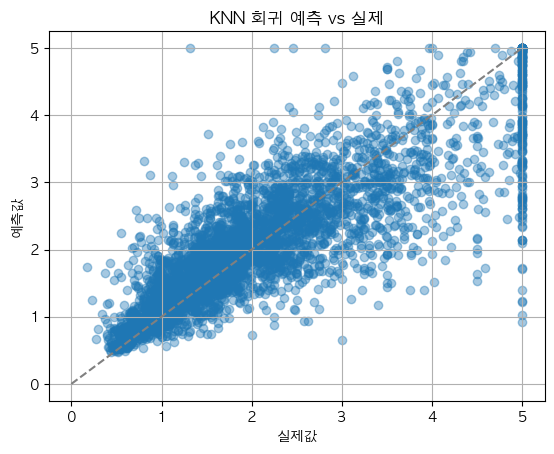

In [20]:
# 정답 및 해설: 예측 시각화

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'AppleGothic'

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

model = KNeighborsRegressor(n_neighbors=7)

model.fit(X1_train_scaled, y1_train) #학습 때 스케일 된 값으로 학습 진행

y_pred = model.predict(X1_test_scaled) #이것도 스케일된 값으로 테스트 
print(f"k={k}, R² Score:{r2_score(y1_test, y_pred):.4f}")

plt.scatter(y1_test, y_pred, alpha=0.4)
plt.plot([0, 5],[0,5], '--', color = 'grey')
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("KNN 회귀 예측 vs 실제")
plt.grid()
plt.show()



- 점들이 대체로 x=y 기준선을 따라 분포하고 있으므로, 모델이 전체적인 추세는 잘 따라가고 있다. 
- 실제값이 4~5에 가까운 고값 영역에서 예측값은 좀 더 분산되 어 있음. 예측이 부정확해지는 경향이 있다.
- 실제값이 5에서 몰림 + 예측값이 다양한 범위로 퍼져있는걸로 보아서 **데이터 편향 또는 클리핑 효과** 가능성이 있다.
- 점들이 선을 따라 퍼져 있지만, 완벽히 붙어 있지 않다는 건 예측 오차가 존재한다는 뜻. 


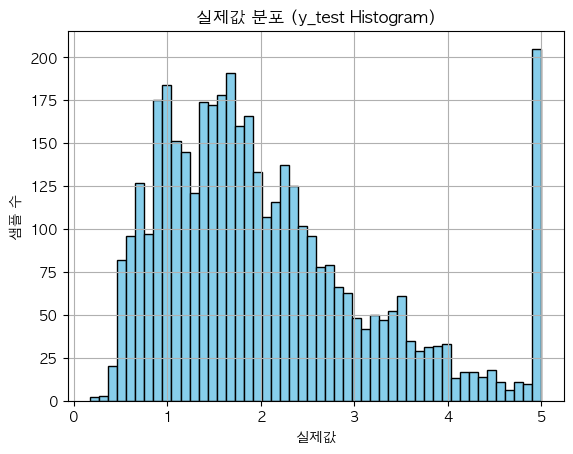

In [22]:
import matplotlib.pyplot as plt

# y_test는 실제값 리스트 또는 배열이어야 해
plt.hist(y1_test, bins=50, color='skyblue', edgecolor='black')
plt.title("실제값 분포 (y_test Histogram)")
plt.xlabel("실제값")
plt.ylabel("샘플 수")
plt.grid(True)
plt.show()

- target원본 확인: 원래 값이 진짜 5가 많았는지? 아니면 자르거나 정제한 건지?

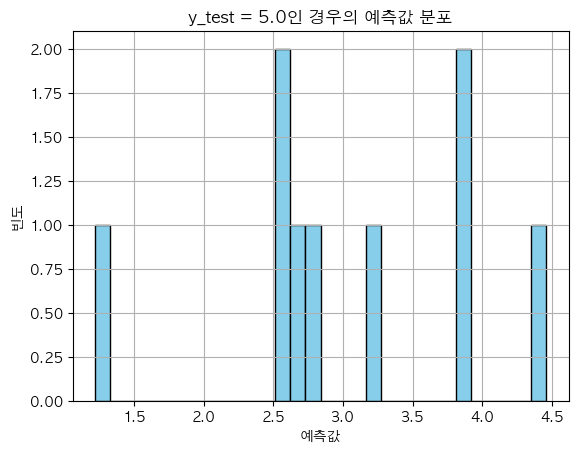

개수: 9, 평균: 3.022, 중앙값: 2.752


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 실제값이 5.0인 인덱스만 추출해서 예측값 선택
clipped_preds = y_pred[y1_test == 5.0]

# 히스토그램 & 간단 통계 출력
plt.hist(clipped_preds, bins=30, color='skyblue', edgecolor='black')
plt.title("y_test = 5.0인 경우의 예측값 분포")
plt.xlabel("예측값")
plt.ylabel("빈도")
plt.grid(True)
plt.show()

print(f"개수: {len(clipped_preds)}, 평균: {clipped_preds.mean():.3f}, 중앙값: {np.median(clipped_preds):.3f}")


- 예측값이 5 근처가 아님
- 일부는 5에 가깝고, 일부는 2.5 이하 -> 불안정함
- 원래 5 이상이었을 데이터가 전부 5로 묶인 것으로, 클리핑 문제가 크다.

### 🔹 문제 B-3
R² 점수가 의미하는 바와 0.85, -0.3의 의미를 해석하세요.

- R² 점수는 모델이 예측값이 실제값을 얼마나 잘 설명하고 있는지를 나타내는 비율이다.
- 1에 가까울수록 우수한 모델이고, 0은 단순 평균, 0 이하는 평균보다 못한 모델이다. 
- R² = 0.85 -> 매우 양호
- R² = -0.3 -> 모델 성능 낮음

## ✅ 미션 C. 붓꽃 전시회 준비!
### 🔹 문제 C-1
KNeighborsClassifier를 이용해 붓꽃 품종을 분류하고 정확도를 계산하세요.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X2_train_scaled, y2_train)
accuracy = clf.score(X2_test_scaled, y2_test)
print("정확도:", accuracy)

accuracy = clf.score(X2_train_scaled, y2_train)
print("정확도:", accuracy)

정확도: 1.0
정확도: 0.9583333333333334


### 🔹 문제 C-2
Confusion Matrix를 출력하고, 어떤 클래스끼리 혼동되었는지 시각적으로 분석하세요.

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


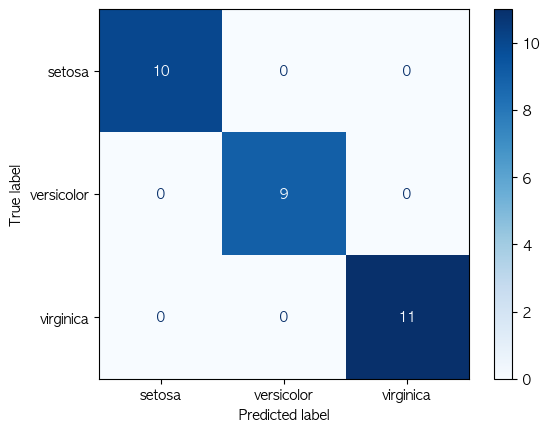

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y2_pred = clf.predict(X2_test_scaled)
cm = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=load_iris().target_names)
disp.plot(cmap='Blues')

# 해설
혼동 행렬의 대각선은 올바르게 분류된 샘플 수를 의미한다.
대각선이 아닌 위치에 값이 있다면, 해당 클래스끼리 혼동된 것이다.
시각화 결과를 통해 어떤 품종(클래스)끼리 오분류가 발생했는지 쉽게 확인할 수 있다. 

## ✅ 미션 D. 의외의 실험: 선형 회귀도 써보자!
### 🔹 문제 D-1
`LinearRegression`을 적용해 같은 데이터를 예측하고, KNN과의 R² 점수와 구조적 차이를 비교하세요.

In [28]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X1_train_scaled, y1_train)
y_lr_pred = lr.predict(X1_test_scaled)
print("선형 회귀 R²:", r2_score(y1_test, y_lr_pred))

선형 회귀 R²: 0.5915150063513249


#### 구조적 차이
- KNN 회귀는 주변 이웃들의 평균, 선형 회귀는 전체 데이터로 직선을 학습하는 것이다.
- KNN 회귀 학습 방식은 사실상 "암기"이고, 선형회귀는 가중치를 학습한다. 
- 데이터의 분포와 복잡성에 따라 성능이 달라진다.
- KNN은 국지적, 선형 회귀는 전체 모델이다.

## 🎁 보너스 질문
### 거리 기반 모델에서 스케일링이 필요한 이유는?
- 중요하지 않은 특성인데, 범위가 큰 feature가 있으면, 거리 계산에서 압도적으로 영향을 미칠 수 있다.
- 그렇게 되면 결과가 왜곡될 수 있기 때문에, 모든 feature가 동등한 중요도로 거리 계산에 참여할 수 있도록 스케일링을 해줘야 한다. 

### KNN이 데이터가 많아질수록 느려지는 이유는?
- KNN은 예측할 때 연산을 한다. 즉, 예측할 때마다 훈련 데이터 전체와 거리 계산을 하기 때문에 훈련 데이터 샘플 수가 많아 질수록 거리 계산 복잡도가 높아져 예측 속도가 느려진다. 

### 이를 개선할 수 있는 방법은?
- K-D Tree/ Ball Tree등 공간을 구조화해서 탐색을 빠르게 한다.
- 이웃 개수 K를 조절한다.
- 데이터 샘플링으로 일부 데이터만 사용하여 속도를 개선한다.
- 차원축소(PCA등)로 특성 수를 줄여서 거리 계산을 단순화한다.